In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import glob, os    


KeyboardInterrupt: 

In [3]:
path = 'output/random_samples/'                  # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))    


df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

#path = 'tuning.csv'
#df = pd.read_csv(path)
#df.reset_index(drop=True, inplace=True)

In [54]:
LSTM_units = list(df['Number of LSTM units'])
lookback = list(df['Lookback period'])
learning_rate = list(df['Learning Rate'])
Avg_MSE = np.power((list(df['Average MSE'])),0.01)
print(Avg_MSE)


[0.89625623 0.88640389]


In [55]:
print(LSTM_units)

[27, 21]


In [56]:
jet=plt.get_cmap('coolwarm')

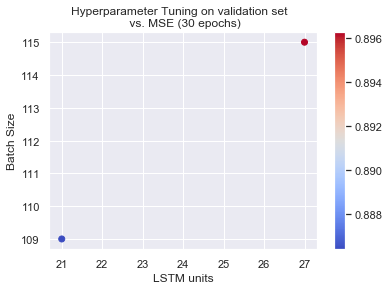

In [57]:
plt.scatter(LSTM_units, lookback, learning_rate, c=Avg_MSE, cmap=jet)
plt.xlabel('LSTM units')
plt.ylabel('Batch Size')

plt.title('Hyperparameter Tuning on validation set  \n vs. MSE (30 epochs)')
plt.colorbar()
seaborn.set()
plt.show()